TCGA-02-0006
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
[0.0000000e+00 2.4615385e-04 7.3846156e-04 ... 2.9926155e+00 2.9975386e+00
 3.0000000e+00]


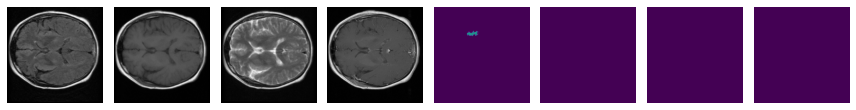

TCGA-02-0011
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
[0.0000000e+00 4.9230771e-04 9.8461541e-04 ... 2.9996307e+00 2.9997540e+00
 3.0000000e+00]


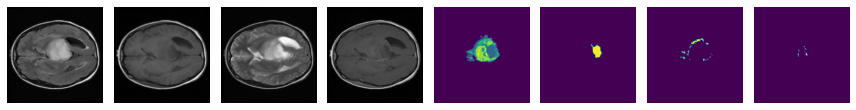

TCGA-02-0027
(250, 250, 186)
(250, 250, 186)
(250, 250, 186)
(250, 250, 186)
(250, 250, 186)
[0.0000000e+00 1.4673924e-05 1.5342341e-05 ... 2.9999311e+00 2.9999583e+00
 3.0000000e+00]


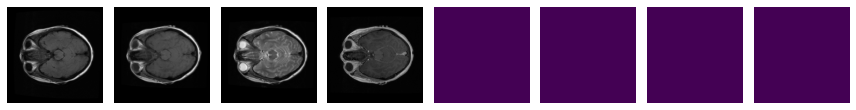

TCGA-02-0033
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
[0.0000000e+00 4.9230771e-04 9.8461541e-04 ... 2.9990153e+00 2.9995077e+00
 3.0000000e+00]


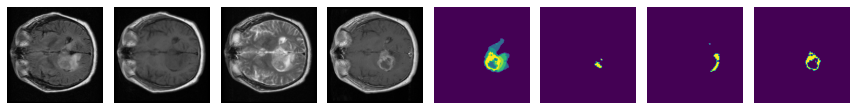

TCGA-02-0034
(200, 200, 156)
(200, 200, 156)
(200, 200, 156)
(200, 200, 156)
(200, 200, 156)
[0.0000000e+00 4.9230771e-04 9.8461541e-04 ... 2.9995077e+00 2.9997540e+00
 3.0000000e+00]


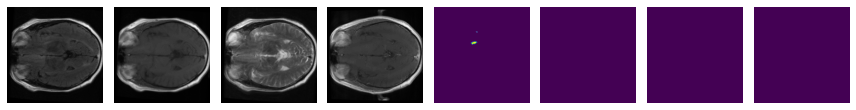

TCGA-02-0037
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
(200, 200, 150)
[0.0000000e+00 4.9230771e-04 7.3846156e-04 ... 2.9996307e+00 2.9997540e+00
 3.0000000e+00]


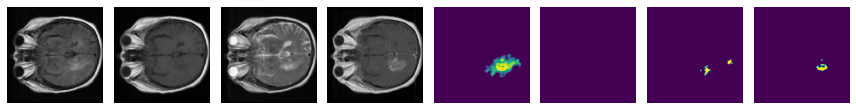

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, z = 5, 80
data = sorted(glob("/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/*/CT1_SEG.nii.gz"))
for i, z in zip([0,2,3,4,5,6],[75,75,75,75,75,75]):
    fname = data[i].split("/")[-2]
    print(fname)
    flair = nib.load(f"/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/{fname}/FLAIR.nii.gz").get_fdata().astype(np.float32)
    t1 = nib.load(f"/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/{fname}/T1.nii.gz").get_fdata().astype(np.float32)
    t2 = nib.load(f"/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/{fname}/T2.nii.gz").get_fdata().astype(np.float32)
    t1c = nib.load(f"/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/{fname}/CT1.nii.gz").get_fdata().astype(np.float32)
    label = nib.load(f"/data_anvar/public_datasets/preproc_study/gbm/4a_resamp/{fname}/CT1_SEG.nii.gz").get_fdata().astype(np.float32)

    print(label.shape), print(flair.shape), print(t1.shape), print(t2.shape), print(t1c.shape)
    print(np.unique(label))
    imgs = [flair[:, :, z]] + [t1[:, :, z]]  + [t2[:, :, z]] + [t1c[:, :, z]] + [label[:, :, z]] + [label[:, :, z]==1] + [label[:, :, z]==2] + [label[:, :, z]==3]
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 12))
    for i in range(8):
        if i < 4:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()

In [103]:
glob('/data_anvar/public_datasets/preproc_study/gbm/*')

['/data_anvar/public_datasets/preproc_study/gbm/dicom',
 '/data_anvar/public_datasets/preproc_study/gbm/ss_indiv_reg',
 '/data_anvar/public_datasets/preproc_study/gbm/3a_atlas',
 '/data_anvar/public_datasets/preproc_study/gbm/orig',
 '/data_anvar/public_datasets/preproc_study/gbm/3b_n4',
 '/data_anvar/public_datasets/preproc_study/gbm/5_ss_shared',
 '/data_anvar/public_datasets/preproc_study/gbm/2a_interp',
 '/data_anvar/public_datasets/preproc_study/gbm/3a_atlas_rpi',
 '/data_anvar/public_datasets/preproc_study/gbm/3d_susan',
 '/data_anvar/public_datasets/preproc_study/gbm/3c_n4_susan',
 '/data_anvar/public_datasets/preproc_study/gbm/1_reg_ss_shared',
 '/data_anvar/public_datasets/preproc_study/gbm/2b_n4',
 '/data_anvar/public_datasets/preproc_study/gbm/2c_n4_susan',
 '/data_anvar/public_datasets/preproc_study/gbm/folders_description.md',
 '/data_anvar/public_datasets/preproc_study/gbm/meta.csv',
 '/data_anvar/public_datasets/preproc_study/gbm/7a_resamp',
 '/data_anvar/public_datasets

In [42]:
import SimpleITK as sitk

# read image
im = sitk.ReadImage("/data_anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-2570/FLAIR.nii.gz")
imt1 = sitk.ReadImage("/data_anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-2570/T1.nii.gz")
imt1c = sitk.ReadImage("/data_anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-2570/CT1.nii.gz")
imt2 = sitk.ReadImage("/data_anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-2570/T2.nii.gz")
imseg = sitk.ReadImage("/data_anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-2570/CT1_SEG.nii.gz")
# get voxel spacing (for 3-D image)
spacing = im.GetSpacing()

In [43]:
print(spacing), print(imt1.GetSpacing()), print(imt1c.GetSpacing()),  print(imt2.GetSpacing()),  print(imseg.GetSpacing())

(0.46880000829696655, 0.46880000829696655, 2.5)
(0.46880000829696655, 0.46880000829696655, 2.5)
(0.46880000829696655, 0.46880000829696655, 2.5)
(0.46880000829696655, 0.46880000829696655, 2.5)
(0.46880000829696655, 0.46880000829696655, 2.5)


(None, None, None, None, None)

In [42]:
len(os.listdir('/data/private_data/gbm_train/images'))

50

In [113]:
import json
import os
from glob import glob
from glob2 import glob
from subprocess import call
import time

import nibabel
import numpy as np
from joblib import Parallel, delayed


def load_nifty(directory, example_id, suffix):
    return nibabel.load(f'{directory}/{suffix}.nii.gz')


def load_channels(d, example_id):
    return [load_nifty(d, example_id, suffix) for suffix in ["FLAIR", "T1", "CT1", "T2"]]


def get_data(nifty, dtype="int16"):
    if dtype == "int16":
        data = np.abs(nifty.get_fdata().astype(np.int16))
        data[data == -32768] = 0
        return data
    return nifty.get_fdata().astype(np.uint8)


def prepare_nifty(d, d_out):
    sub = d.split("/")[-1]
    flair, t1, t1ce, t2 = load_channels(d, sub)
    affine, header = flair.affine, flair.header
    vol = np.stack([get_data(flair), get_data(t1), get_data(t1ce), get_data(t2)], axis=-1)
    vol = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
#     print('l')
#     print( os.path.join(d_out, sub + ".nii.gz"))
    nibabel.save(vol, os.path.join(d_out, sub + ".nii.gz"))
#     print(glob(f'{d}/{sub}/**/MASK.nii.gz')[0])
    if os.path.exists(f'{d}/CT1_SEG.nii.gz'):
        seg = load_nifty(d, sub, "CT1_SEG")
        affine, header = seg.affine, seg.header
        vol = get_data(seg, "unit8")
#         vol[vol == 4] = 3
#         mask = np.zeros(vol.shape, dtype=np.uint8)
#         mask[vol == 2] = 1
#         mask[vol == 3] = 2
#         mask[vol == 1] = 3
        seg = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
#         print(os.path.join(d_out, sub + "_seg.nii.gz"))
        nibabel.save(seg, os.path.join(d_out, sub + "_seg.nii.gz"))


def prepare_dirs(d_out, train):
    img_path, lbl_path = os.path.join(d_out, "images"), os.path.join(d_out, "labels")
    call(f"mkdir {img_path}", shell=True)
    if train:
        call(f"mkdir {lbl_path}", shell=True)
    dirs = glob(os.path.join(d_out, "*"))
    for d in dirs:
        if '.nii.gz' in d:
                if "FLAIR" in d or "T1" in d or "CT1" in d or "T2" in d:
                    continue
                if "_seg" in d:
                    call(f"mv {d} {lbl_path}", shell=True)
                else:
                    call(f"mv {d} {img_path}", shell=True)
                
#         call(f"rm -rf {d}", shell=True)
         

def prepare_dataset_json(d_out, train):
    images, labels = glob(os.path.join(d_out, "images", "*")), glob(os.path.join(d_out, "labels", "*"))
    images = sorted([img.replace(d_out + "/", "") for img in images])
    labels = sorted([lbl.replace(d_out + "/", "") for lbl in labels])
    
    modality = {"0": "FLAIR", "1": "T1", "2": "T1CE", "3": "T2"}
    labels_dict = {"0": "background", "1": "edema", "2": "tumor core", "3": "enhancing tumour"}
    if train:
        key = "training"
        data_pairs = [{"image": img, "label": lbl} for (img, lbl) in zip(images, labels)]
    else:
        key = "test"
        data_pairs = [{"image": img} for img in images]

    dataset = {
        "labels": labels_dict,
        "modality": modality,
        key: data_pairs,
    }

    with open(os.path.join(d_out, "dataset.json"), "w") as outfile:
        json.dump(dataset, outfile)


def run_parallel(func, args):
    return Parallel(n_jobs=os.cpu_count())(delayed(func)(arg) for arg in args)


def prepare_dataset(data, train, out):
    print(f"Preparing GBM dataset from: {data}")
    d_out = out
    if not os.path.exists(d_out):
        call(f"mkdir {d_out}", shell=True)
    start = time.time()
#     run_parallel(prepare_nifty, sorted(glob(os.path.join(data, "*"))))
    for each in sorted(glob(os.path.join(data, "*"))):
        if os.path.exists(os.path.join(each, "CT1_SEG.nii.gz")):
#             print(each.split('/')[-1])
#             if each.split('/')[-1] in ['TCGA-08-0520', 'TCGA-06-0142', 'TCGA-02-0037']  :
                
                prepare_nifty(each, d_out)
    prepare_dirs(d_out, train)
    prepare_dataset_json(d_out, train)
    end = time.time()
    print(f"Preparing time: {(end - start):.2f}")


In [114]:
prepare_dataset('/data_anvar/public_datasets/preproc_study/gbm/4a_resamp', True, '/data/private_data/gbm_4a_resamp')

Preparing GBM dataset from: /data_anvar/public_datasets/preproc_study/gbm/4a_resamp
Preparing time: 424.29


In [71]:
# prepare_dataset('/data_anvar/public_datasets/preproc_study/gbm/3a_atlas',True, '/data/private_data/gbm_3a_atlas_train')

TCGA-02-0006
(256, 256)
(256, 256)
[0]
[0]


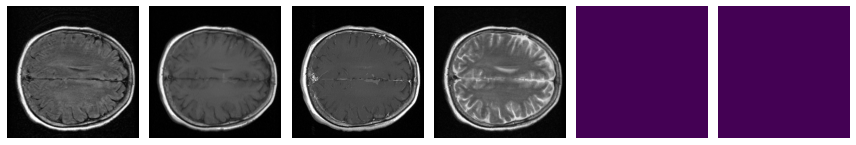

TCGA-02-0011
(256, 256)
(256, 256)
[0 1 2 4]
[0 1 2 3]


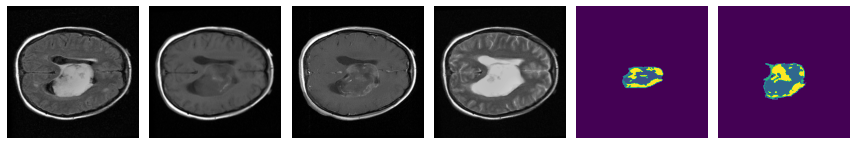

TCGA-02-0027
(512, 512)
(512, 512)
[0 2]
[0 2 3]


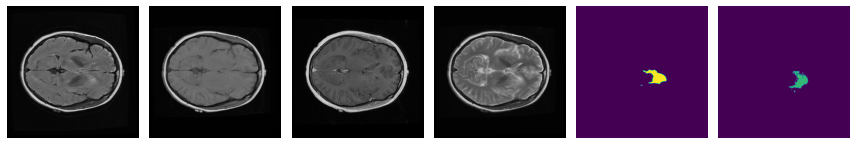

TCGA-02-0033
(256, 256)
(256, 256)
[0 1 2 4]
[0 1 2 3]


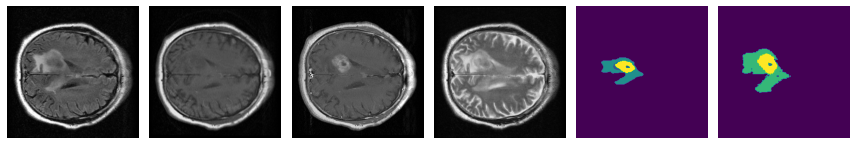

TCGA-02-0034
(256, 256)
(256, 256)
[0 1 2 4]
[0 1 2 3]


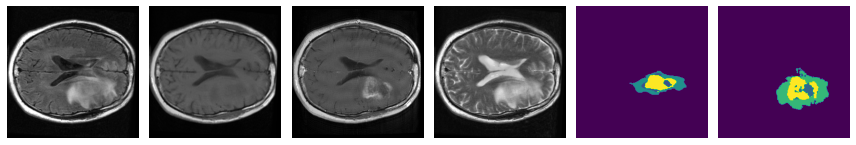

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, z = 5, 110
data = sorted(glob("/results/gbm_infer/2_n4/predictions_best_epoch=84-dice_mean=73_32_task=17_fold=0_tta/*.npy"))
for i, z in zip([0,2,3,4,5,6],[15,15,65,15, 15]):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
    img = nib.load(f"/data/private_data/gbm_train/images/{fname}.nii.gz").get_fdata().astype(np.float32)
    label = nib.load(f"/data/private_data/gbm_train/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, z]
    pred = np.load(data[i])
    pred = to_lbl(np.round(pred, 0))[:, :, z]
#     pred = np.round(pred, 0).transpose(3,2,1,0)
    print(label.shape), print(pred.shape)
    print(np.unique(pred)), print(np.unique(label))
    imgs = [img[:, :, z, i] for i in [0, 1, 2, 3]] + [pred] + [label]
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    for i in range(6):
        if i < 4:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()

TCGA-02-0006
(240, 240)
(240, 240)
[0 1 2]
[0 1 2 3]


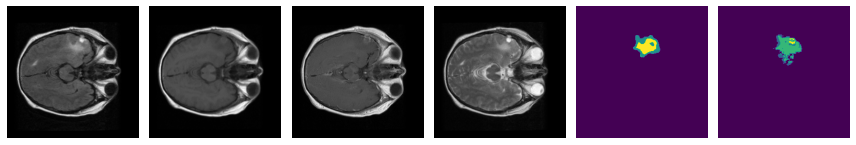

TCGA-02-0011
(240, 240)
(240, 240)
[0 1 2]
[0 1 2]


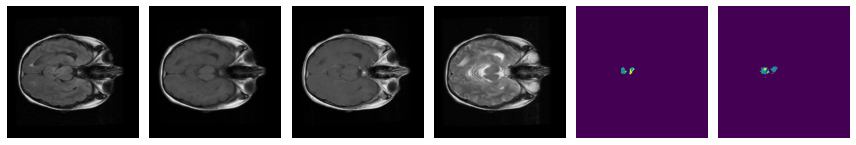

TCGA-02-0027
(240, 240)
(240, 240)
[0]
[0]


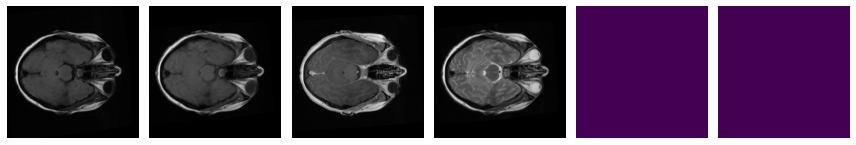

TCGA-02-0033
(240, 240)
(240, 240)
[0]
[0]


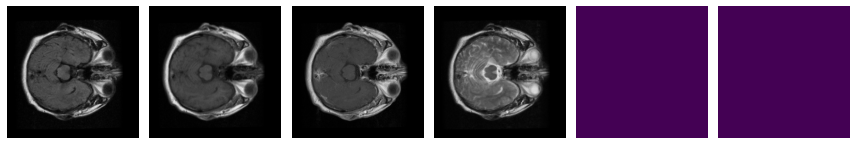

TCGA-02-0034
(240, 240)
(240, 240)
[0]
[0]


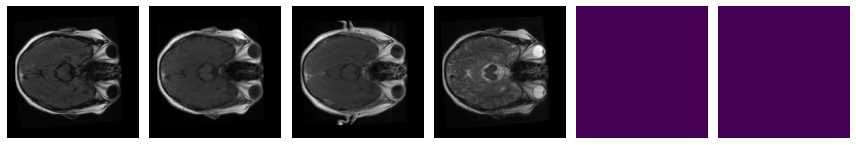

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, z = 5, 110
data = sorted(glob("/results/gbm_infer/gbm_3a_atlas/predictions_best_epoch=72-dice_mean=69_64_task=20_fold=0_tta/*.npy"))
for i, z in zip([0,2,3,4,5,6],[50,50,45,45, 45]):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
    img = nib.load(f"/data/private_data/gbm_3a_atlas_train/images/{fname}.nii.gz").get_fdata().astype(np.float32)
    label = nib.load(f"/data/private_data/gbm_3a_atlas_train/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, z]
    pred = np.load(data[i])
    pred = to_lbl(np.round(pred, 0))[:, :, z]
#     pred = np.round(pred, 0).transpose(3,2,1,0)
    print(label.shape), print(pred.shape)
    print(np.unique(pred)), print(np.unique(label))
    imgs = [img[:, :, z, i] for i in [0, 1, 2, 3]] + [pred] + [label]
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    for i in range(6):
        if i < 4:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()

In [174]:
import os
import sys
import argparse
import numpy as np
import torch
import pandas as pd
import nibabel as nib    
from pathlib import Path
from surface_distance import metrics
from tqdm import tqdm
import torch.nn as nn
import ants

def sensitivity_and_specificity(mask_gt, mask_pred):
    """ Computes sensitivity and specificity
     sensitivity  = TP/(TP+FN)
     specificity  = TN/(TN+FP) """
    volume_sum = mask_gt.sum() + mask_pred.sum()
    tp = (mask_gt & mask_pred).sum()
    tn = (~mask_gt & ~mask_pred).sum()
    fp = (~mask_gt & mask_pred).sum()
    fn = (mask_gt & ~mask_pred).sum()
#     TP/(TP+FP) - precision; TP/(TP+FN) - recall
    return tp/(tp+fn), tp/(tp+fp), tn/(tn+fp)


def calculate_metrics_brats(true_mask, pred_mask, ids, spaces):
    """ Takes two file locations as input and validates surface distances.
    Be careful with dimensions of saved `pred` it should be 3D.
    
    """
    
    _columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
    
    df = pd.DataFrame(columns = _columns)
    df.at[0,'Ids'] = ids
    #class 1
    distances = metrics.compute_surface_distances((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1), spaces)
    df.at[0,'Dice_1'] = metrics.compute_dice_coefficient((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Surface_dice_1'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_1'] = metrics.compute_robust_hausdorff(distances, 95)
    sens, precision, spec = sensitivity_and_specificity((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Sensitivity_1'] = sens
    df.at[0,'Precision_1'] = precision
    df.at[0,'Specificity_1'] = spec
    #class 2
    distances = metrics.compute_surface_distances((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1), spaces)
    df.at[0,'Dice_2'] = metrics.compute_dice_coefficient((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1))
    df.at[0,'Surface_dice_2'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_2'] = metrics.compute_robust_hausdorff(distances, 95)
    sens,precision, spec= sensitivity_and_specificity((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1))
    df.at[0,'Sensitivity_2'] = sens
    df.at[0,'Precision_2'] = precision
    df.at[0,'Specificity_2'] = spec
    #class 3
    distances = metrics.compute_surface_distances((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1), spaces)
    df.at[0,'Dice_3'] = metrics.compute_dice_coefficient((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
    df.at[0,'Surface_dice_3'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_3'] = metrics.compute_robust_hausdorff(distances, 95)
    sens, precision, spec= sensitivity_and_specificity((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
    df.at[0,'Sensitivity_3'] = sens
    df.at[0,'Precision_3'] = precision
    df.at[0,'Specificity_3'] = spec
    return df

    
def calculate_metrics(path_to_pred, path_to_target, spaces = [1,1,1], out = '/home/polina/glioma/all_dice_metrics.csv'  ):
    
    """ 
    - path_to_pred - path to folder with predict subjects
    - path_to_target - path to folder with target subjects
    - name_pred - name for prediction, ex -brainTumorMask_SRI.nii.gz
    - name_target - name for targets, ex -GTV_to_SRI.nii.gz
    - spaces - if false - [1,1,1]
    - name_csv - name files for each subjects
    - path_csv_all - path to the main file with metrics for each subjects
    """
    _columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
    
    af_all = pd.DataFrame(columns = _columns)
    pred_folder = Path(path_to_pred)
    target_folder = Path(path_to_target)
    for ids in tqdm(os.listdir(pred_folder)):
        sub = ids[:-8]
#         sub = ids[:-8]
        targets = ants.image_read(f'{target_folder}/{sub}_seg.nii.gz')
        spaces = targets.spacing
#         print(spaces)
        targets = ants.reorient_image2(targets, orientation = 'RPI').numpy() 
#         print(targets.shape), print(np.unique(targets))
        y_wt, y_tc, y_et = targets > 0, ((targets == 1) + (targets == 3)) > 0, targets == 3
        targets = np.stack([y_wt, y_tc, y_et], axis=0).astype(int)
#         print(targets.shape), print(np.unique(targets))
#         predictions = np.load((os.path.join(path_to_pred, ids)))
        predictions = np.load((os.path.join(path_to_pred, ids)))['arr_0']
#         pred = nn.functional.interpolate(torch.from_numpy(predictions), size=tuple([23,  0,  0]), mode="trilinear", align_corners=True)
        pred = np.round(predictions, 0)
        pred = np.transpose(pred, (0, 3, 2, 1))
#         print(targets.shape), print(np.unique(targets))
#         print(pred.shape), print(np.unique(pred))
        df=calculate_metrics_brats(targets.astype('int'), pred.astype('int'), sub, spaces)
#         print(df)
        af_all = af_all.append(df)
    af_all.to_csv(out)  
    print(af_all.mean())
    

In [177]:
calculate_metrics('/results/gbm_infer/5_ss_shared/predictions_best_epoch=48-dice_mean=67_14_task=28_fold=2_tta', '/data/private_data/gbm_3a_atlas_train/labels', out = '/results/gbm_infer/5_ss_shared/metrics_gbm_5_ss_shared_fold-2_label_from_3atlas.csv')


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102/102 [06:50<00:00,  4.03s/it]

Dice_1            0.882347
Dice_2            0.604879
Dice_3            0.610892
Hausdorff95_1     6.929437
Hausdorff95_2     9.235856
Hausdorff95_3     6.267433
Sensitivity_1     0.897353
Sensitivity_2     0.746440
Sensitivity_3     0.668377
Specificity_1     0.998602
Specificity_2     0.996260
Specificity_3     0.999204
Surface_dice_1    0.734031
Surface_dice_2    0.671140
Surface_dice_3    0.710706
Precision_1       0.873062
Precision_2       0.520064
Precision_3       0.595240
dtype: float64


TCGA-02-0006
[49]
(3, 155, 240, 240)
(240, 240, 155)
[0 1 2 3]
(240, 240, 155, 4)
(240, 240, 155)
[0 1 2 3]


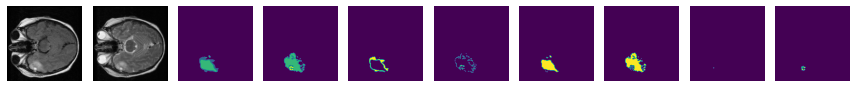

TCGA-02-0011
[98]
(3, 155, 240, 240)
(240, 240, 155)
[0 1 2 3]
(240, 240, 155, 4)
(240, 240, 155)
[0 1 2 3]


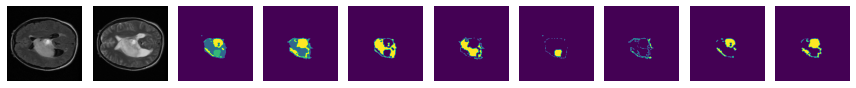

TCGA-02-0027
[94]
(3, 155, 240, 240)
(240, 240, 155)
[0 1 2 3]
(240, 240, 155, 4)
(240, 240, 155)
[0 1 2 3]


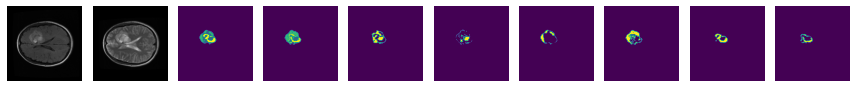

TCGA-02-0033
[98]
(3, 155, 240, 240)
(240, 240, 155)
[0 1 2 3]
(240, 240, 155, 4)
(240, 240, 155)
[0 1 2 3]


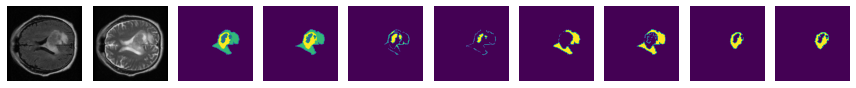

TCGA-02-0034
[108]
(3, 155, 240, 240)
(240, 240, 155)
[0 1 2 3]
(240, 240, 155, 4)
(240, 240, 155)
[0 1 2 3]


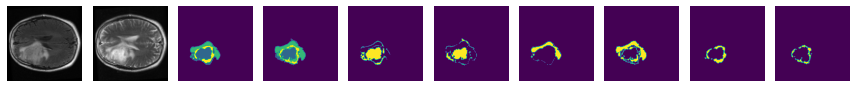

In [222]:
from scipy.ndimage import measurements
def to_lbl(pred):
    enh = pred[2]
    c1, c2, c3 = pred[0] > 0.5, pred[1] > 0.5, pred[2] > 0.5
    pred = (c1 > 0).astype(np.uint8)
    pred[(c2 == False) * (c1 == True)] = 2
    pred[(c3 == True) * (c1 == True)] = 3

    components, n = measurements.label(pred == 3)
    for et_idx in range(1, n + 1):
        _, counts = np.unique(pred[components == et_idx], return_counts=True)
        if 1 < counts[0] and counts[0] < 8 and np.mean(enh[components == et_idx]) < 0.9:
            pred[components == et_idx] = 1

    et = pred == 3
    if 0 < et.sum() and et.sum() < 73 and np.mean(enh[et]) < 0.9:
        pred[et] = 1
    pred = np.transpose(pred, (2, 1, 0)).astype(np.uint8)
    return pred

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, l = 5, 75
data = sorted(glob("/results/gbm_infer/2a_interp/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta/*.npy"))
for i, z in zip([0,2,3,4,5,6],[10,15,65,15, 15]):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
#     img = np.load(f"/data/private_data/21_3d/{fname}_x.npy").astype(np.float32).transpose(3,2,1,0)
#     label = np.load(f"/data/private_data/21_3d/{fname}_y.npy").astype(np.uint8).transpose(3,2,1,0)
    img_orig = nib.load(f"/data/private_data/gbm_2a_interp/images/{fname}.nii.gz").get_fdata()
    label_orig = nib.load(f"/data/private_data/gbm_2a_interp/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
    l = np.argsort(label_orig.sum(axis=(0,1)))[-1:]
    print(l)
    pred = np.load(data[i])
    print(pred.shape), print(label_orig.shape), print(np.unique(label_orig)), print(img_orig.shape)
    p = to_lbl(np.round(pred, 0))
#     p = np.round(pred, 0).transpose(3,2,1,0)
    print(p.shape), print(np.unique(p))
#     imgs = [img[:, :, l, i] for i in [0, 3]] + [img_orig[:, :, z, i] for i in [0, 3]] + [label_orig] +  [label[:,:, l, 0]]+  [label[:, :, l, 0]==1] +  [label[:, :, l, 0]==2] +  [label[:, :, l, 0]==3] 
    imgs = [img_orig[:, :, l, i] for i in [0,3]] + [p[:,:,l]] + [label_orig[:,:,l]] +[p[:,:,l]==1] +[label_orig[:,:,l]==1] + [p[:,:,l]==2] + [label_orig[:,:,l]==2] + [p[:,:,l]==3] + [label_orig[:,:,l]==3] 
 
    fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12, 12))
    for i in range(10):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()

TCGA-02-0006
[49]
(240, 240, 155, 3)
[0 1]
(240, 240, 155, 3)
[0. 1.]


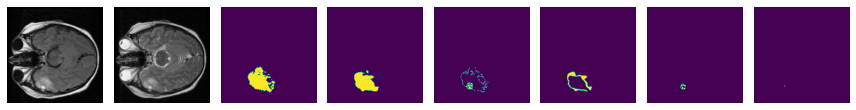

TCGA-02-0011
[98]
(240, 240, 155, 3)
[0 1]
(240, 240, 155, 3)
[0. 1.]


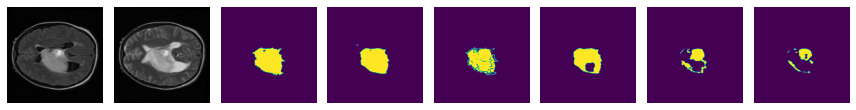

TCGA-02-0027
[94]
(240, 240, 155, 3)
[0 1]
(240, 240, 155, 3)
[0. 1.]


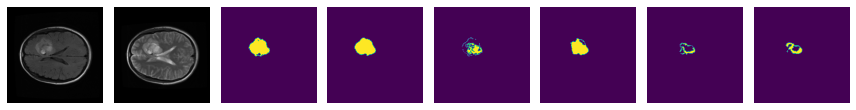

TCGA-02-0033
[98]
(240, 240, 155, 3)
[0 1]
(240, 240, 155, 3)
[0. 1.]


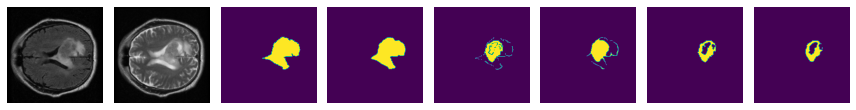

TCGA-02-0034
[108]
(240, 240, 155, 3)
[0 1]
(240, 240, 155, 3)
[0. 1.]


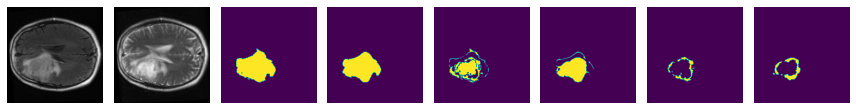

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob

n, l = 5, 75
data = sorted(glob("/results/gbm_infer/2a_interp/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta/*.npy"))
for i, z in zip([0,2,3,4,5,6],[10,15,65,15, 15]):
    fname = data[i].split("/")[-1].split(".")[0]
    print(fname)
#     img = np.load(f"/data/private_data/21_3d/{fname}_x.npy").astype(np.float32).transpose(3,2,1,0)
#     label = np.load(f"/data/private_data/21_3d/{fname}_y.npy").astype(np.uint8).transpose(3,2,1,0)
    img_orig = nib.load(f"/data/private_data/gbm_2a_interp/images/{fname}.nii.gz").get_fdata()
    label_orig = nib.load(f"/data/private_data/gbm_2a_interp/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
    l = np.argsort(label_orig.sum(axis=(0,1)))[-1:]
    y_wt, y_tc, y_et = label_orig > 0, ((label_orig == 1) + (label_orig == 3)) > 0, label_orig == 3
    label_orig = np.stack([y_wt, y_tc, y_et], axis=0).astype(int).transpose(1,2,3,0)
    print(l)
    pred = np.load(data[i])
    print(label_orig.shape), print(np.unique(label_orig))
#     p = to_lbl(np.round(pred, 0))
    p = np.round(pred, 0).transpose(3,2,1,0)
    print(p.shape), print(np.unique(p))
#     imgs = [img[:, :, l, i] for i in [0, 3]] + [img_orig[:, :, z, i] for i in [0, 3]] + [label_orig] +  [label[:,:, l, 0]]+  [label[:, :, l, 0]==1] +  [label[:, :, l, 0]==2] +  [label[:, :, l, 0]==3] 
    imgs = [img_orig[:, :, l, i] for i in [0,3]] + [label_orig[:,:,l,0]] +[p[:,:,l,0]] +[label_orig[:,:,l,1]] + [p[:,:,l,1]] + [label_orig[:,:,l,2]] + [p[:,:,l,2]]
 
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 12))
    for i in range(8):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
    plt.tight_layout()            
    plt.show()

(1.0, 1.0, 1.0)
[81]
(240, 240, 155, 3)
(240, 240, 155, 3)
[0 1]


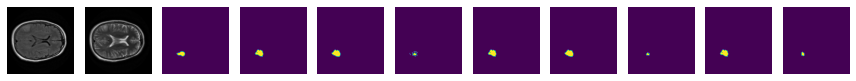

dice WT
0.4107753787769888
0.8914124716096944
Dice_2
0.2721209050996285
0.4852245862884161
Dice_3
0.5822436338609773
0.8128011011699932


In [90]:
import ants
fname = 'TCGA-12-3650'
#             Ids    Dice_1   Dice_2    Dice_3 Hausdorff95_1 Hausdorff95_2  \
# 0  TCGA-12-3650  0.879787  0.36124  0.736353 
img_orig = nib.load(f"/data/private_data/gbm_3a_atlas_train/images/{fname}.nii.gz").get_fdata()
label_orig = nib.load(f"/data/private_data/gbm_3a_atlas_train/labels/{fname}_seg.nii.gz")
lab = nib.load(f"/data/private_data/5_ss_shared/labels/{fname}_seg.nii.gz").get_fdata().astype(np.uint8)
spaces = label_orig.header.get_zooms()
print(spaces)
label_orig = label_orig.get_fdata().astype(np.uint8)
l = np.argsort(label_orig.sum(axis=(0,1)))[-1:]
label_orig = ants.reorient_image2(ants.from_numpy(label_orig), orientation = 'LAS').numpy() 
y_wt, y_tc, y_et = label_orig > 0, ((label_orig == 1) + (label_orig == 3)) > 0, label_orig == 3
label_orig = np.stack([y_wt, y_tc, y_et], axis=0).astype(int).transpose(1,2,3,0)

y_wt, y_tc, y_et = lab > 0, ((lab == 1) + (lab == 3)) > 0, lab == 3
lab = np.stack([y_wt, y_tc, y_et], axis=0).astype(int).transpose(1,2,3,0)
print(l)
pred = np.load(f'/results/gbm_infer/5_ss_shared/predictions_best_epoch=50-dice_mean=71_17_task=28_fold=0_tta/{fname}.npy.npz')['arr_0']
p = np.round(pred, 0).transpose(3,2,1,0).astype(np.uint8)
print(label_orig.shape)
print(p.shape), print(np.unique(p))
imgs = [img_orig[:, :, l, i] for i in [0,3]] + [label_orig[:,:,l,0]] + [lab[:,:,l,0]] +[p[:,:,l,0]] +[label_orig[:,:,l,1]] +  [lab[:,:,l,0]]  +[p[:,:,l,1]] + [label_orig[:,:,l,2]] +  [lab[:,:,l,0]]  + [p[:,:,l,2]]
 
fig, ax = plt.subplots(nrows=1, ncols=11, figsize=(12, 12))
for i in range(11):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
plt.tight_layout()            
plt.show()

print('dice WT')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,0]==1), (p[:,:,:,0]==1)))
print(metrics.compute_dice_coefficient((lab[:,:,:,0]==1), (p[:,:,:,0]==1)))
print('Dice_2')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,1]==1), (p[:,:,:,1]==1)))
print(metrics.compute_dice_coefficient((lab[:,:,:,1]==1), (p[:,:,:,1]==1)))
print('Dice_3')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,2]==1), (p[:,:,:,2]==1)))
print(metrics.compute_dice_coefficient((lab[:,:,:,2]==1), (p[:,:,:,2]==1)))

In [59]:
import os
import sys
import argparse
import numpy as np
import torch
import pandas as pd
import nibabel as nib    
from pathlib import Path
from surface_distance import metrics
from tqdm import tqdm
import torch.nn as nn

def sensitivity_and_specificity(mask_gt, mask_pred):
    """ Computes sensitivity and specificity
     sensitivity  = TP/(TP+FN)
     specificity  = TN/(TN+FP) """
    volume_sum = mask_gt.sum() + mask_pred.sum()
    tp = (mask_gt & mask_pred).sum()
    tn = (~mask_gt & ~mask_pred).sum()
    fp = (~mask_gt & mask_pred).sum()
    fn = (mask_gt & ~mask_pred).sum()
#     TP/(TP+FP) - precision; TP/(TP+FN) - recall
    return tp/(tp+fn), tp/(tp+fp), tn/(tn+fp)


def calculate_metrics_brats(true_mask, pred_mask, ids, spaces):
    """ Takes two file locations as input and validates surface distances.
    Be careful with dimensions of saved `pred` it should be 3D.
    
    """
    
    _columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
    
    df = pd.DataFrame(columns = _columns)
    df.at[0,'Ids'] = ids
    #class 1
    distances = metrics.compute_surface_distances((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1), spaces)
    df.at[0,'Dice_1'] = metrics.compute_dice_coefficient((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Surface_dice_1'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_1'] = metrics.compute_robust_hausdorff(distances, 95)
    sens, precision, spec = sensitivity_and_specificity((true_mask[0,:,:,:]==1), (pred_mask[0,:,:,:]==1))
    df.at[0,'Sensitivity_1'] = sens
    df.at[0,'Precision_1'] = precision
    df.at[0,'Specificity_1'] = spec
    #class 2
    distances = metrics.compute_surface_distances((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1), spaces)
    df.at[0,'Dice_2'] = metrics.compute_dice_coefficient((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1))
    df.at[0,'Surface_dice_2'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_2'] = metrics.compute_robust_hausdorff(distances, 95)
    sens,precision, spec= sensitivity_and_specificity((true_mask[1,:,:,:]==1), (pred_mask[1,:,:,:]==1))
    df.at[0,'Sensitivity_2'] = sens
    df.at[0,'Precision_2'] = precision
    df.at[0,'Specificity_2'] = spec
    #class 3
    distances = metrics.compute_surface_distances((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1), spaces)
    df.at[0,'Dice_3'] = metrics.compute_dice_coefficient((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
    df.at[0,'Surface_dice_3'] = metrics.compute_surface_dice_at_tolerance(distances,1)
    df.at[0,'Hausdorff95_3'] = metrics.compute_robust_hausdorff(distances, 95)
    sens, precision, spec= sensitivity_and_specificity((true_mask[2,:,:,:]==1), (pred_mask[2,:,:,:]==1))
    df.at[0,'Sensitivity_3'] = sens
    df.at[0,'Precision_3'] = precision
    df.at[0,'Specificity_3'] = spec
    return df

    
def calculate_metrics(path_to_pred, path_to_target, spaces = [1,1,1], out = '/home/polina/glioma/all_dice_metrics.csv'  ):
    
    """ 
    - path_to_pred - path to folder with predict subjects
    - path_to_target - path to folder with target subjects
    - name_pred - name for prediction, ex -brainTumorMask_SRI.nii.gz
    - name_target - name for targets, ex -GTV_to_SRI.nii.gz
    - spaces - if false - [1,1,1]
    - name_csv - name files for each subjects
    - path_csv_all - path to the main file with metrics for each subjects
    """
    _columns = ['Ids','Dice_1', 'Dice_2', 'Dice_3',
                'Hausdorff95_1', 'Hausdorff95_2', 'Hausdorff95_3',
                'Sensitivity_1', 'Sensitivity_2', 'Sensitivity_3',
               'Specificity_1', 'Specificity_2', 'Specificity_3',
               'Surface_dice_1', 'Surface_dice_2', 'Surface_dice_3',
               'Precision_1', 'Precision_2', 'Precision_3']
    
    af_all = pd.DataFrame(columns = _columns)
    pred_folder = Path(path_to_pred)
    target_folder = Path(path_to_target)
    for ids in tqdm(os.listdir(pred_folder)):
        sub = ids[:-8]
#         print(sub)
#         print(target_folder /  f'{sub}_seg.nii.gz')
        targets = nib.load(target_folder /  f'{sub}_seg.nii.gz')
        spaces = targets.header.get_zooms()
        targets = targets.get_fdata()
#         targets = ants.reorient_image2(ants.from_numpy(targets), orientation = 'LAS').numpy() 
#         print(targets.shape), print(np.unique(targets))
        y_wt, y_tc, y_et = targets > 0, ((targets == 1) + (targets == 3)) > 0, targets == 3
        targets = np.stack([y_wt, y_tc, y_et], axis=0).astype(int)
#         print(targets.shape), print(np.unique(targets))
        predictions = np.load((os.path.join(path_to_pred, ids)))['arr_0']
        mask =  nib.load(f'/data_anvar/public_datasets/preproc_study/gbm/5_ss_shared/{sub}/CT1_mask.nii.gz').get_fdata()
#         predictions = np.load((os.path.join(path_to_pred, ids)))['arr_0']
#         pred = nn.functional.interpolate(torch.from_numpy(predictions), size=tuple([23,  0,  0]), mode="trilinear", align_corners=True)
        pred = np.round(predictions, 0)
        pred = np.transpose(pred, (0, 3, 2, 1))
#         print(pred.shape), print(np.unique(pred))
        check = np.concatenate(((pred[0,:,:,:]* mask)[np.newaxis,:,:,:], (pred[1,:,:,:]* mask)[np.newaxis,:,:,:], (pred[2, :,:,:]* mask)[np.newaxis,:,:,:]), axis=0)

#         print(targets.shape), print(np.unique(targets))
#         print(pred.shape), print(np.unique(pred))
        df=calculate_metrics_brats(targets.astype('int'), check.astype('int'), sub, spaces)
#         print(df)
        af_all = af_all.append(df)
    af_all.to_csv(out)  
    print(af_all.mean())
    

In [86]:
calculate_metrics('/results/gbm_infer/gbm_3a_atlas/predictions_best_epoch=88-dice_mean=65_83_task=20_fold=2_tta', '/data/private_data/gbm_3a_atlas_train/labels', out = '/results/gbm_infer/2a_interp_aug/metrics_gbm_3aatlas_withoutbrain_label_from_3aatlas_fold-2.csv')


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102/102 [05:39<00:00,  3.33s/it]

Dice_1             0.869605
Dice_2             0.583751
Dice_3             0.597930
Hausdorff95_1     12.734259
Hausdorff95_2     11.135279
Hausdorff95_3      6.845354
Sensitivity_1      0.866342
Sensitivity_2      0.671006
Sensitivity_3      0.677215
Specificity_1      0.998684
Specificity_2      0.996565
Specificity_3      0.999006
Surface_dice_1     0.697780
Surface_dice_2     0.602079
Surface_dice_3     0.683371
Precision_1        0.882807
Precision_2        0.535210
Precision_3        0.577281
dtype: float64


(1.0, 1.0, 1.0)
[90]


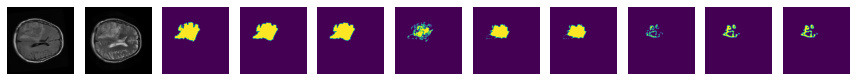

TCGA-06-1802
dice WT
0.9194698859985956
0.9194698859985956
Dice_2
0.6191905315439078
0.6191905315439078
Dice_3
0.6611847769932839
0.6611847769932839


In [165]:
import ants
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
fname = 'TCGA-06-1802'
#             Ids    Dice_1   Dice_2    Dice_3 Hausdorff95_1 Hausdorff95_2  \
# 0  TCGA-12-3650  0.879787  0.36124  0.736353 
img_orig = nib.load(f"/data/private_data/gbm_3a_atlas_train/images/{fname}.nii.gz").get_fdata()
label_orig = nib.load(f"/data/private_data/gbm_3a_atlas_train/labels/{fname}_seg.nii.gz")
spaces = label_orig.header.get_zooms()
print(spaces)
label_orig = label_orig.get_fdata().astype(np.uint8)
l = np.argsort(label_orig.sum(axis=(0,1)))[-1:]
# label_orig = ants.reorient_image2(ants.from_numpy(label_orig), orientation = 'LAS').numpy() 
y_wt, y_tc, y_et = label_orig > 0, ((label_orig == 1) + (label_orig == 3)) > 0, label_orig == 3
label_orig = np.stack([y_wt, y_tc, y_et], axis=0).astype(int).transpose(1,2,3,0)
print(l)
pred = np.load(f'/results/gbm_infer/gbm_3a_atlas/predictions_best_epoch=71-dice_mean=69_92_task=20_fold=0_tta/{fname}.npy.npz')['arr_0']
mask =  nib.load(f'/data_anvar/public_datasets/preproc_study/gbm/5_ss_shared/{fname}/CT1_mask.nii.gz').get_fdata()
p = np.round(pred, 0).transpose(3,2,1,0).astype(np.uint8)
# print(label_orig.shape)
# print(p.shape), print(np.unique(p))
# print(mask.shape), print(np.unique(mask))
# print((p[:,:,:,0]* mask).shape)
check = np.concatenate(((p[:,:,:,0]* mask)[:,:,:,np.newaxis], (p[:,:,:,1]* mask)[:,:,:,np.newaxis], (p[:,:,:,2]* mask)[:,:,:,np.newaxis]), axis=3)
# print(check.shape), print(np.unique(check))
imgs = [img_orig[:, :, l, i] for i in [0,3]] + [label_orig[:,:,l,0]] +[check[:,:,l,0]] +[p[:,:,l,0]] +[label_orig[:,:,l,1]] + [check[:,:,l,1]] + [p[:,:,l,1]]+ [label_orig[:,:,l,2]] + [check[:,:,l,2]] +[p[:,:,l,2]]
 
fig, ax = plt.subplots(nrows=1, ncols=11, figsize=(12, 12))
for i in range(11):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
plt.tight_layout()            
plt.show()

print(fname)
print('dice WT')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,0]==1), (p[:,:,:,0]==1)))
print(metrics.compute_dice_coefficient((label_orig[:,:,:,0]==1), (check[:,:,:,0]==1)))
print('Dice_2')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,1]==1), (p[:,:,:,1]==1)))
print(metrics.compute_dice_coefficient((label_orig[:,:,:,1]==1), (check[:,:,:,1]==1)))
print('Dice_3')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,2]==1), (p[:,:,:,2]==1)))
print(metrics.compute_dice_coefficient((label_orig[:,:,:,2]==1), (check[:,:,:,2]==1)))

In [25]:
#hist

In [95]:
!cd /results/gbm_infer/6_histogram_fold_1 && ls -l 

total 44
drwxr-xr-x 2 root root 4096 Mar  1 12:13 'predictions_best_epoch=0-dice_mean=6_54_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 12:44 'predictions_best_epoch=14-dice_mean=53_15_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 12:20 'predictions_best_epoch=2-dice_mean=33_34_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 12:24 'predictions_best_epoch=4-dice_mean=34_75_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 12:30 'predictions_best_epoch=7-dice_mean=40_92_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 12:35 'predictions_best_epoch=8-dice_mean=51_34_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 15:45 'predictions_best_epoch=81-dice_mean=61_77_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Feb 28 13:23 'predictions_best_epoch=81-dice_mean=62_48_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 14:34 'predictions_epoch=29-dice_mean=57_60_task=31.1_fold=1_tta'
drwxr-xr-x 2 root root 4096 Mar  1 14:53 'predic

(240, 240, 155)
(240, 240, 155, 5)
[0 1 2 3]
[86]
(240, 240, 155, 3)
(240, 240, 155, 5)
[0 1]
(240, 240, 155, 3)
[0 1]


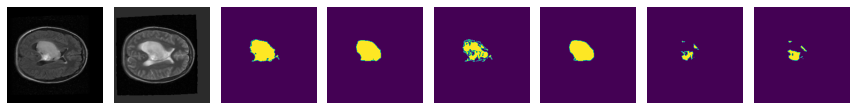

In [ ]:
import ants
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
fname = 'TCGA-02-0011'
#             Ids    Dice_1   Dice_2    Dice_3 Hausdorff95_1 Hausdorff95_2  \
# 0  TCGA-12-3650  0.879787  0.36124  0.736353 
# img_orig = nib.load(f"/data/private_data/6_histogram_fold_1/images/{fname}.nii.gz").get_fdata()
img_orig = np.load(f"/data/private_data/31.1_3d/{fname}_x.npy").transpose(3,2,1,0)
label_orig = np.load(f"/data/private_data/31.1_3d/{fname}_y.npy").transpose(0,3,2,1).squeeze()
# label_orig = nib.load(f"/data/private_data/6_histogram_fold_1/labels/{fname}_seg.nii.gz")
print(label_orig.shape), print(img_orig.shape)
print(np.unique(label_orig))
# spaces = label_orig.header.get_zooms()
# print(spaces)
# label_orig = label_orig.get_fdata().astype(np.uint8)
l = np.argsort(label_orig.sum(axis=(0,1)))[-1:]
# label_orig = ants.reorient_image2(ants.from_numpy(label_orig), orientation = 'LAS').numpy() 
y_wt, y_tc, y_et = label_orig > 0, ((label_orig == 1) + (label_orig == 3)) > 0, label_orig == 3
label_orig = np.stack([y_wt, y_tc, y_et], axis=0).astype(int).transpose(1,2,3,0)
print(l)
pred = np.load(f'/results/gbm_infer/6_histogram_fold_1/predictions_best_epoch=81-dice_mean=61_77_task=31.1_fold=1_tta/{fname}.npy.npz')['arr_0']
p = np.round(pred, 0).transpose(3,2,1,0).astype(np.uint8)
print(label_orig.shape), print(img_orig.shape)
print(np.unique(label_orig))
print(p.shape), print(np.unique(p))
# print(mask.shape), print(np.unique(mask))
# print((p[:,:,:,0]* mask).shape)
# check = np.concatenate(((p[:,:,:,0]* mask)[:,:,:,np.newaxis], (p[:,:,:,1]* mask)[:,:,:,np.newaxis], (p[:,:,:,2]* mask)[:,:,:,np.newaxis]), axis=3)
# print(check.shape), print(np.unique(check))
imgs = [img_orig[:, :, l, i] for i in [0,3]] + [label_orig[:,:,l,0]]  +[p[:,:,l,0]] +[label_orig[:,:,l,1]] +  [p[:,:,l,1]]+ [label_orig[:,:,l,2]] +[p[:,:,l,2]]
 
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 12))
for i in range(8):
        if i < 2:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i]);
        ax[i].axis('off')  
plt.tight_layout()            
plt.show()

print(fname)
print('dice WT')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,0]==1), (p[:,:,:,0]==1)))
# print(metrics.compute_dice_coefficient((label_orig[:,:,:,0]==1), (check[:,:,:,0]==1)))
print('Dice_2')
print(metrics.
      compute_dice_coefficient((label_orig[:,:,:,1]==1), (p[:,:,:,1]==1)))
# print(metrics.compute_dice_coefficient((label_orig[:,:,:,1]==1), (check[:,:,:,1]==1)))
print('Dice_3')
print(metrics.compute_dice_coefficient((label_orig[:,:,:,2]==1), (p[:,:,:,2]==1)))
# print(metrics.compute_dice_coefficient((label_orig[:,:,:,2]==1), (check[:,:,:,2]==1)))

In [ ]:
export CUDA_VISIBLE_DEVICES=0 && python ../main.py --exec_mode predict --task ${task}_3d --data /data/private_data/${task}_3d --dim 3 --fold 1 --nfolds 3 --ckpt_path /results/gbm_results/$name/fold-1/checkpoints/best*.ckpt --results /results/gbm_infer/$name --amp --tta --save_preds

In [70]:
# !export CUDA_VISIBLE_DEVICES=0 && python ../main.py --exec_mode predict --task 31.1 --data /data/private_data/31.1_3d --dim 3 --fold 1 --nfolds 3 --ckpt_path /results/gbm_results/6_histogram_fold_1/fold-1/checkpoints/best*.ckpt --results /results/gbm_infer/6_histogram_fold_1 --amp --tta --save_preds

In [96]:
len(os.listdir('/results/gbm_infer/6_histogram_fold_1/predictions_best_epoch=81-dice_mean=61_77_task=31.1_fold=1_tta'))

102